# Energy Use Prediction

## Submitted by:
- Suhavni Mathur (s3874834)
- Maansi Arora (s3885529)

## Table of Contents

- FIXME

## Introduction

### Dataset Details
The given dataset is the UCI dataset- collected in 2017 (provided to us through canvas) which contains information about various factors affecting the energy consumption in a household. This contains attributes like temperatures and humidity levels in different areas of the house and the data and time details which affect the amount of energy usage in different areas. It also contains information from Chievres weather station which may also play a role in affecting the energy consumption eventually. Here, our target feature is “target_energy” which records the energy consumption levels through various appliances and devices in a low energy building.

### Dataset variables

| Column   Name                | Attribute/Target | Description | Units |
|:-------------------------------------|:-------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------|
| T1         | Attribute1       |  Temperature in kitchen area| Celsius |
| RH_1         | Attribute2     |  Humidity in kitchen area| Percentage |
| T2       | Attribute3      |  Temperature in living room area| Celsius |
| RH_2     | Attribute4      |  Humidity in living room area| Percentage |
| T3       | Attribute5     |  Temperature in laundry room area| Celsius |
| RH_3      | Attribute6      |  Humidity in laundry room area| Percentage |
| T4       | Attribute7     |  Temperature in office room area| Celsius |
| RH_4      | Attribute8      |  Humidity in office room area| Percentage |
| T5       | Attribute9     |  Temperature in  bathroom| Celsius |
| RH_5      | Attribute10      |  Humidity in bathroom| Percentage |
| T6       | Attribute11     |  Temperature outside the building (north side)| Celsius |
| RH_6      | Attribute12      |  Humidity outside the building (north side)| Percentage |
| T7       | Attribute13     |  Temperature in ironing room| Celsius |
| RH_7     | Attribute14      |  Humidity in ironing room| Percentage |
| T8       | Attribute15     |  Temperature in teenager room 2| Celsius |
| RH_8     | Attribute16      |  Humidity in teenager room 2| Percentage |
| T9       | Attribute17     |  Temperature in parents room| Celsius |
| RH_9     | Attribute18      |  Humidity in parents room| Percentage |
| T_out       | Attribute19      |  Temperature outside (from Chievres weather station)| Celsius |
|  Press_mm_hg      | Attribute20      |  Pressure (from Chievres weather station)| mm Hg |
|  RH_out     | Attribute21      |  Humidity outside (from Chievres weather station)| Percentage |
|  Windspeed     | Attribute22     |  Wind speed (from Chievres weather station)| m/s |
|  Visibility     | Attribute23     | Visibility (from Chievres weather station)| km |
|  Tdewpoint     | Attribute24     | Tdewpoint (from Chievres weather station)| 'c2\'b0C |
|  rv1     | Attribute25     | Random variable 1| nondimentional |
|  rv2     | Attribute26     | Random variable 2| nondimentional |
|  TARGET_Energy     | Attribute27     | energy use of Appliances and light fixtures in the house| Wh |

### Response Variable 
For this project the target feature in this dataset is "TARGET_Energy". It has information about energy usage of appliances and light fixtures in the house of  a low-energy building. It has integer values and the unit for the attribute is Wh.

## Data Preprocessing

Let's start with data cleaning and preprocessing to make it ready for visualization and further modeling.

### Data Retrieval
- Import in the downloaded dataset from the folder and load the modules that will be used.
- Display 5 randomly sampled rows from this dataset.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# import libraries and modules
import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
###

In [2]:
df=pd.read_csv('UCI-electricity/UCI_data.csv') # Reading the data and displaying sample rows
df.sample(5, random_state=999)

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
1292,2016-03-07 01:20:00,19.79,37.363333,17.426667,39.790000,20.100000,38.933333,20.100000,36.790000,17.600000,62.940000,-0.300,76.800000,17.89,31.790000,21.200,43.990000,17.6000,38.363333,0.133333,747.666667,97.666667,1.000000,51.333333,-0.200000,10.672942,10.672942,60
8973,2016-05-18 07:50:00,23.29,41.900000,21.225714,44.147143,24.390000,38.560000,23.066667,39.590000,21.657143,47.768571,13.900,32.933333,23.20,39.466667,23.390,42.738571,22.6000,42.875556,11.633333,752.866667,81.500000,2.666667,25.833333,8.516667,27.619852,27.619852,70
4158,2016-05-18 09:40:00,23.39,42.900000,23.542857,40.825714,24.290000,38.966667,23.290000,40.333333,21.238571,46.342857,19.050,3.547500,23.00,38.590000,23.254,43.156000,22.6000,41.834000,14.433333,752.233333,71.666667,4.000000,26.666667,9.400000,8.850150,8.850150,80
3538,2016-03-11 06:40:00,20.29,36.200000,16.700000,41.790000,20.566667,37.400000,19.790000,34.090000,17.790000,49.790000,0.000,70.863333,19.39,35.626667,20.890,43.000000,18.1000,41.060000,-0.866667,764.000000,93.333333,1.000000,23.333333,-1.833333,9.366347,9.366347,30
7261,2016-05-19 13:00:00,23.39,41.500000,24.760000,36.433333,24.390000,38.700000,23.600000,39.663333,21.347143,47.000000,17.445,1.000000,23.10,36.805714,22.700,39.725714,22.6375,42.733750,15.300000,754.600000,55.000000,2.000000,40.000000,6.300000,14.580822,14.580822,50


In [3]:
df.shape # displaying the shape of the dataset

(19735, 28)

The dataset initially before cleaning has 19,735 rows and 28 columns.

### Data Cleaning
- Drop irrelevant features in our dataset
- Check and rename/ modify some column names
- Check for missing values
- Check for outliers

We now use the `date` column to create additional features like "Month" and "Hour" on which the target variable may depend. 

In [4]:
# creating additional features to represent time series information
df['date'] = pd.to_datetime(df['date']) # converting date from string type to date type

df['Month'] = df.date.dt.month
df['Hour'] = df.date.dt.hour

In [ ]:
df=df.drop('date',axis=1) # Dropping the original data attribute

In [6]:
df.columns # displaying all the columns to check everything is in place 

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'TARGET_energy', 'Month', 'Hour'],
      dtype='object')

#### Check and rename/ modify some column names
- Converted all column names to lowercase and removed the whitespaces (if any).
- Made the column names more understandable.

In [7]:
# Changing the column names into more relevant ones 
df_new_columns={
    'T1':'kitchen_temp',
    'RH_1':'kitchen_humid',
    'T2':'living_temp',
    'RH_2':'living_humid',
    'T3':'laundry_temp',
    'RH_3':'laundry_humid',
    'T4':'office_temp',
    'RH_4':'office_humid',
    'T5':'bathroom_temp',
    'RH_5':'bathroom_humid',
    'T6':'out_north_temp',
    'RH_6':'out_north_humid',
    'T7':'ironing_temp',
    'RH_7':'ironing_humid',
    'T8': 'teen2_temp',
    'RH_8' :'teen2_humid',
    'T9': 'parent_temp',
    'RH_9': 'parent_humid',
    'To': 'temp_out',
    'RH_out': 'humid_out'
    }
df = df.rename(columns = df_new_columns)
df.columns = df.columns.str.lower().str.strip()
df.sample(5, random_state=999)

,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,bathroom_temp,bathroom_humid,out_north_temp,out_north_humid,ironing_temp,ironing_humid,teen2_temp,teen2_humid,parent_temp,parent_humid,t_out,press_mm_hg,humid_out,windspeed,visibility,tdewpoint,rv1,rv2,target_energy,month,hour
1292,19.79,37.363333,17.426667,39.790000,20.100000,38.933333,20.100000,36.790000,17.600000,62.940000,-0.300,76.800000,17.89,31.790000,21.200,43.990000,17.6000,38.363333,0.133333,747.666667,97.666667,1.000000,51.333333,-0.200000,10.672942,10.672942,60,3,1
8973,23.29,41.900000,21.225714,44.147143,24.390000,38.560000,23.066667,39.590000,21.657143,47.768571,13.900,32.933333,23.20,39.466667,23.390,42.738571,22.6000,42.875556,11.633333,752.866667,81.500000,2.666667,25.833333,8.516667,27.619852,27.619852,70,5,7
4158,23.39,42.900000,23.542857,40.825714,24.290000,38.966667,23.290000,40.333333,21.238571,46.342857,19.050,3.547500,23.00,38.590000,23.254,43.156000,22.6000,41.834000,14.433333,752.233333,71.666667,4.000000,26.666667,9.400000,8.850150,8.850150,80,5,9
3538,20.29,36.200000,16.700000,41.790000,20.566667,37.400000,19.790000,34.090000,17.790000,49.790000,0.000,70.863333,19.39,35.626667,20.890,43.000000,18.1000,41.060000,-0.866667,764.000000,93.333333,1.000000,23.333333,-1.833333,9.366347,9.366347,30,3,6
7261,23.39,41.500000,24.760000,36.433333,24.390000,38.700000,23.600000,39.663333,21.347143,47.000000,17.445,1.000000,23.10,36.805714,22.700,39.725714,22.6375,42.733750,15.300000,754.600000,55.000000,2.000000,40.000000,6.300000,14.580822,14.580822,50,5,13


#### Check for missing values
Before changing the data type of variables (if required), first check if there are any missing values in our dataset. 

In [8]:
# Checking for missing/null values in each column
print(df.isnull().sum())

kitchen_temp       0
kitchen_humid      0
living_temp        0
living_humid       0
laundry_temp       0
laundry_humid      0
office_temp        0
office_humid       0
bathroom_temp      0
bathroom_humid     0
out_north_temp     0
out_north_humid    0
ironing_temp       0
ironing_humid      0
teen2_temp         0
teen2_humid        0
parent_temp        0
parent_humid       0
t_out              0
press_mm_hg        0
humid_out          0
windspeed          0
visibility         0
tdewpoint          0
rv1                0
rv2                0
target_energy      0
month              0
hour               0
dtype: int64


There are no missing values in the dataset.

#### Check for data type of variables
Next let's check the data types of variables and observe if they match the intended data types.

In [9]:
# Check the data type of variables
print(f"Shape of the dataset = {df.shape} \n")
print(f"Data types of variable are given below where 'object' indicates a string type: ")
print(df.dtypes)

Shape of the dataset = (19735, 29) 

Data types of variable are given below where 'object' indicates a string type: 
kitchen_temp       float64
kitchen_humid      float64
living_temp        float64
living_humid       float64
laundry_temp       float64
laundry_humid      float64
office_temp        float64
office_humid       float64
bathroom_temp      float64
bathroom_humid     float64
out_north_temp     float64
out_north_humid    float64
ironing_temp       float64
ironing_humid      float64
teen2_temp         float64
teen2_humid        float64
parent_temp        float64
parent_humid       float64
t_out              float64
press_mm_hg        float64
humid_out          float64
windspeed          float64
visibility         float64
tdewpoint          float64
rv1                float64
rv2                float64
target_energy        int64
month                int64
hour                 int64
dtype: object


### Finding outliers 
Next, we find out the outliers for all the integers or floating variables in our dataset.

In [10]:
# Creating a function to obtain all the outliers in the dataset and then dropping them
def func(df,x):
    q1_val = df[x].quantile(0.25)
    q3_val = df[x].quantile(0.75)
    iqr = q3_val - q1_val
    max_whisker = q3_val + 1.5*iqr
    min_whisker = q1_val - 1.5*iqr
    outliers = df[(df[x] < min_whisker) | (df[x] > max_whisker)][''+x+'']
    print('Number of '+ x +' outliers:', outliers.shape[0])
    plt.figure(figsize = (7,5))
    sns.boxplot(df[x])
    plt.title('Boxplot of '+ x, fontsize = 15)
    plt.xlabel(x, color='black')
    plt.show()
    df = df.drop(outliers.index)
    return df

Number of kitchen_temp outliers: 515


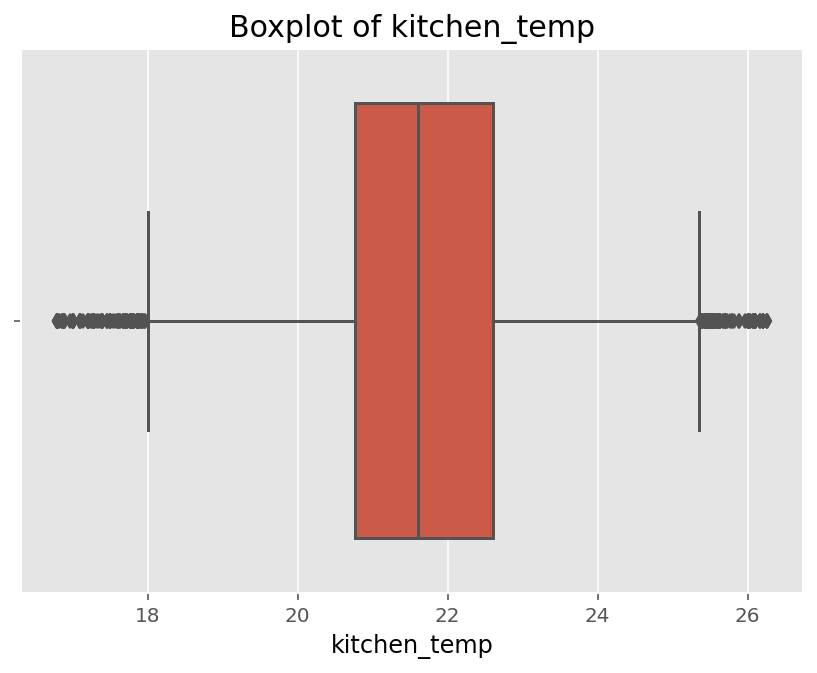

Number of kitchen_humid outliers: 157


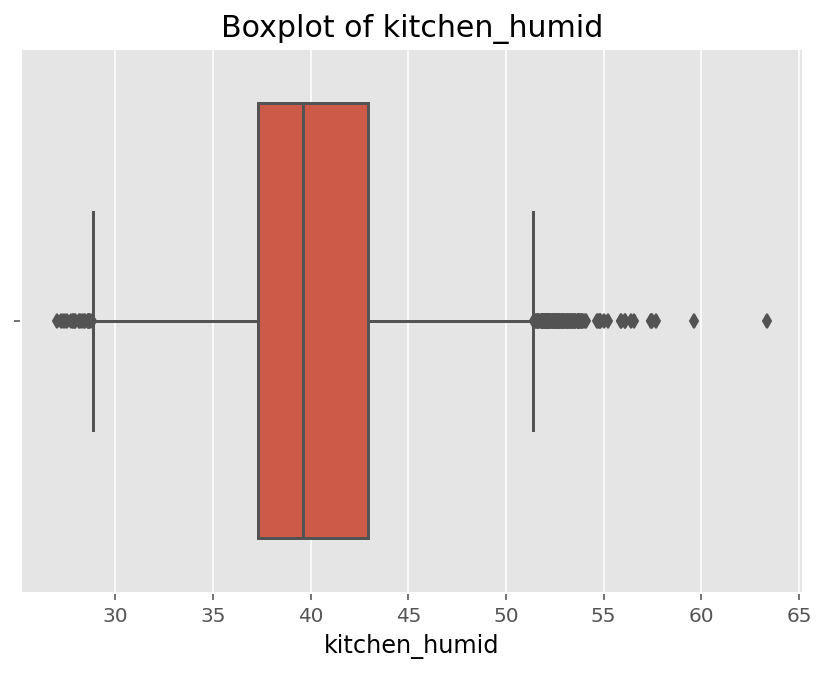

Number of living_temp outliers: 471


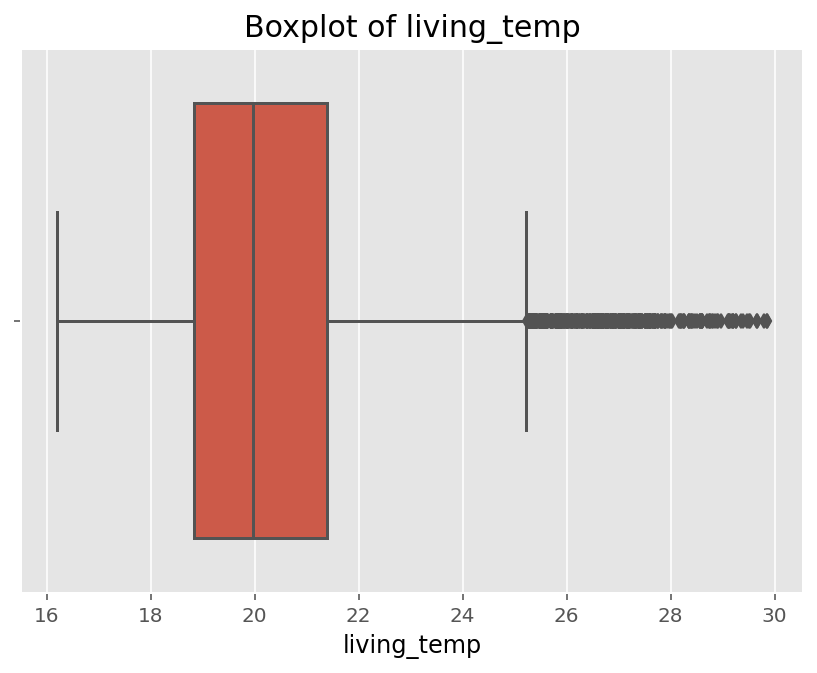

Number of living_humid outliers: 97


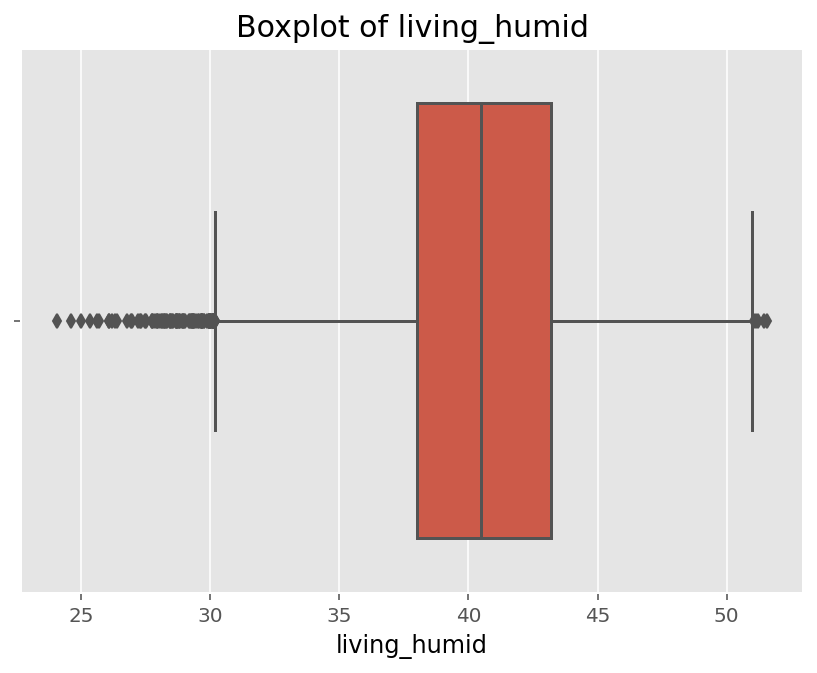

Number of laundry_temp outliers: 77


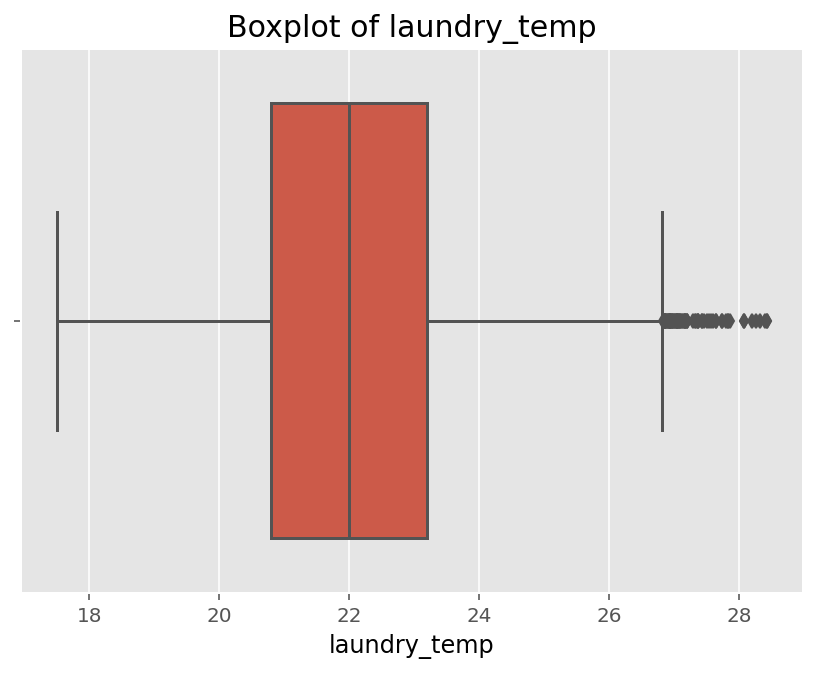

Number of laundry_humid outliers: 17


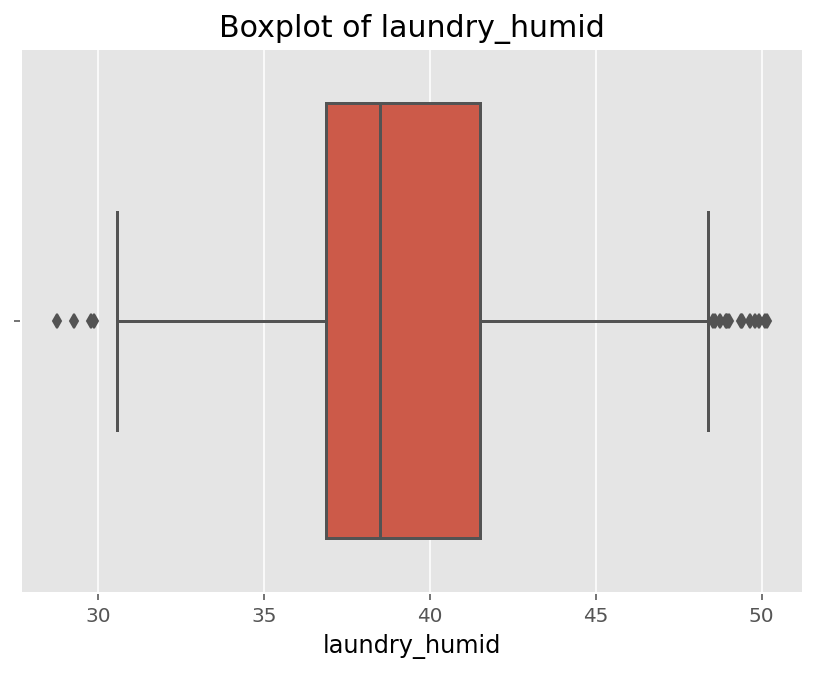

Number of office_temp outliers: 203


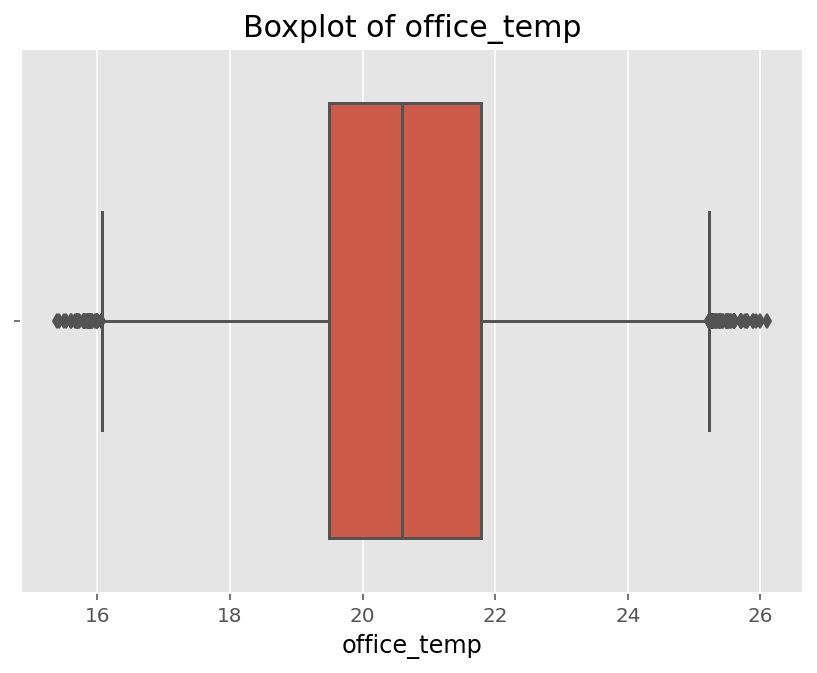

Number of office_humid outliers: 0


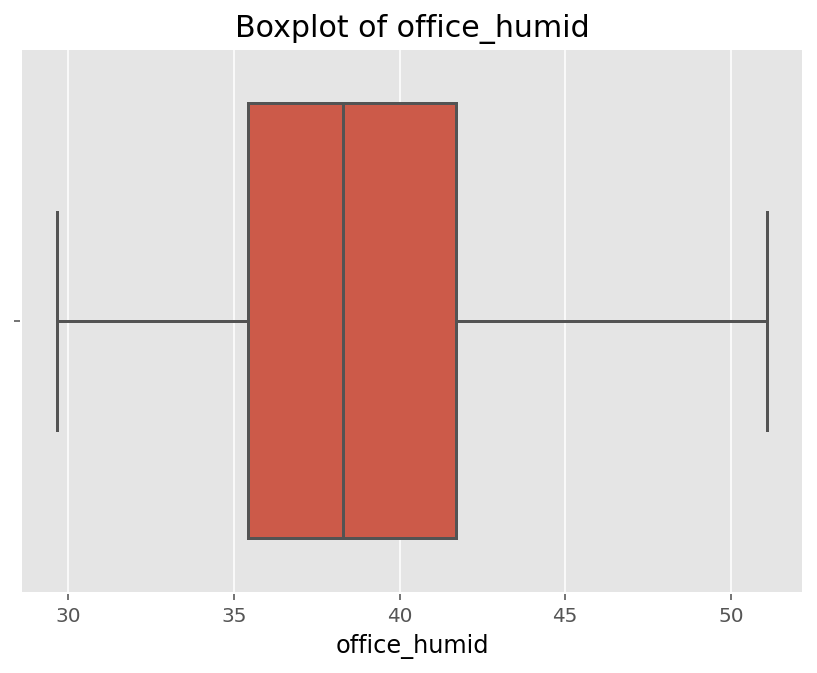

Number of bathroom_temp outliers: 336


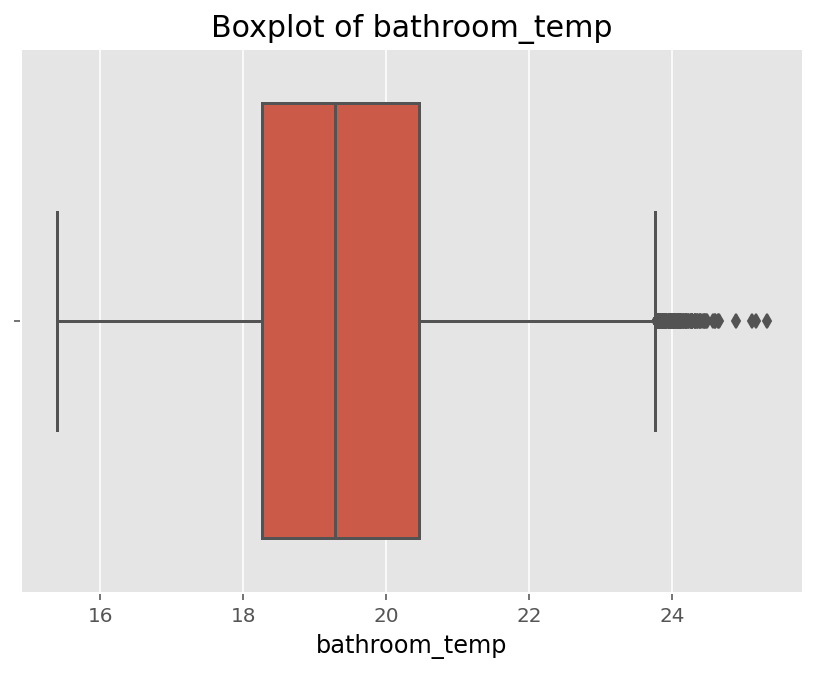

Number of bathroom_humid outliers: 1177


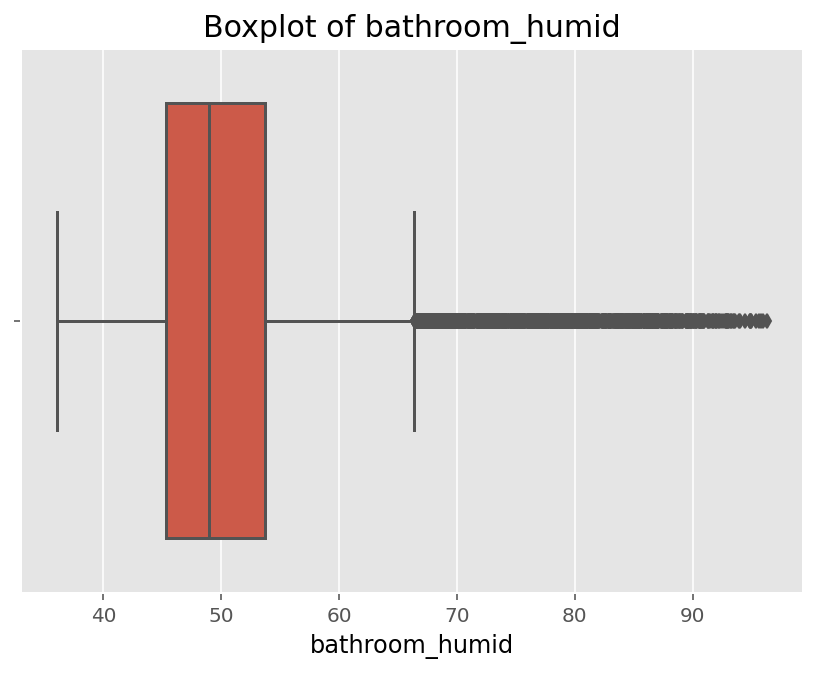

Number of out_north_temp outliers: 153


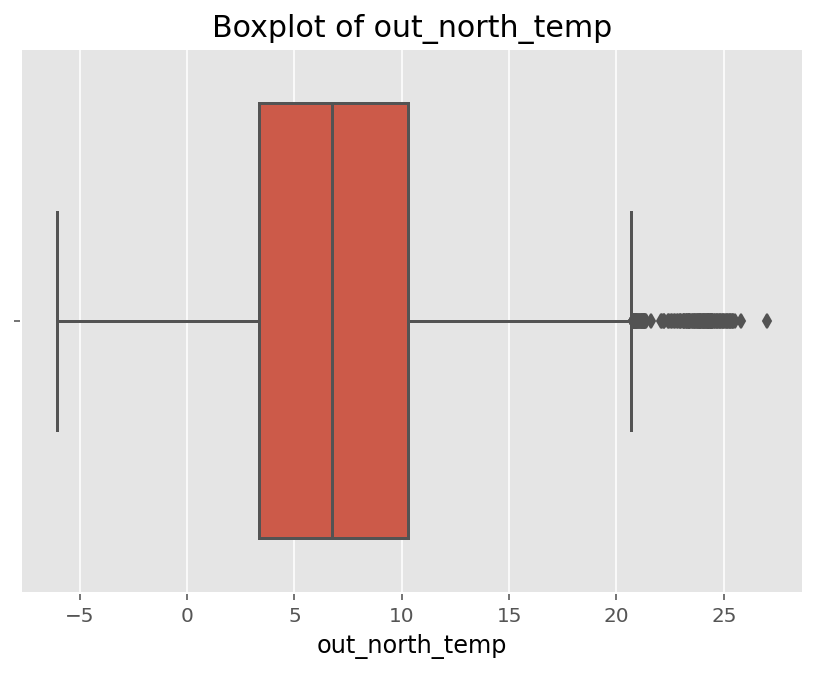

Number of out_north_humid outliers: 0


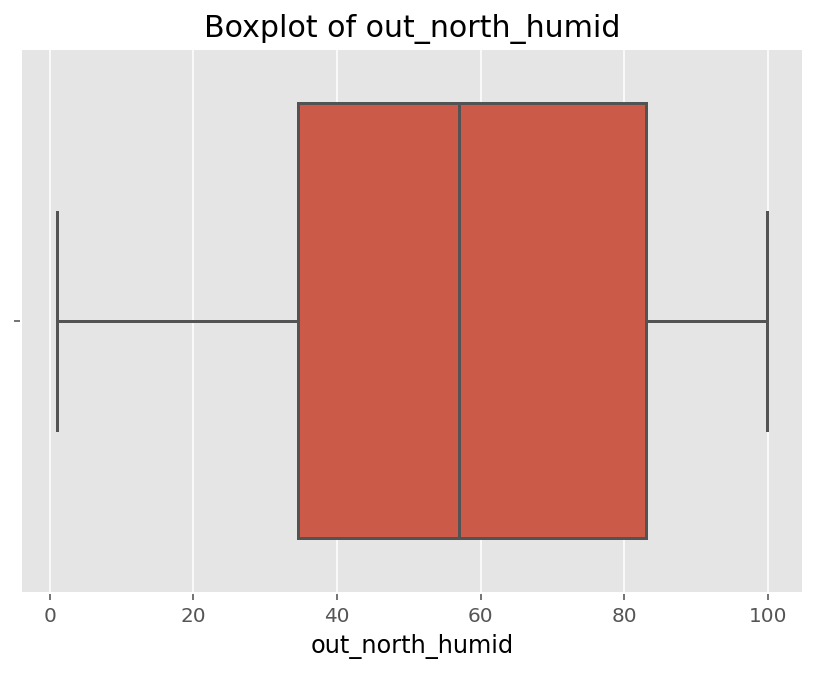

Number of ironing_temp outliers: 0


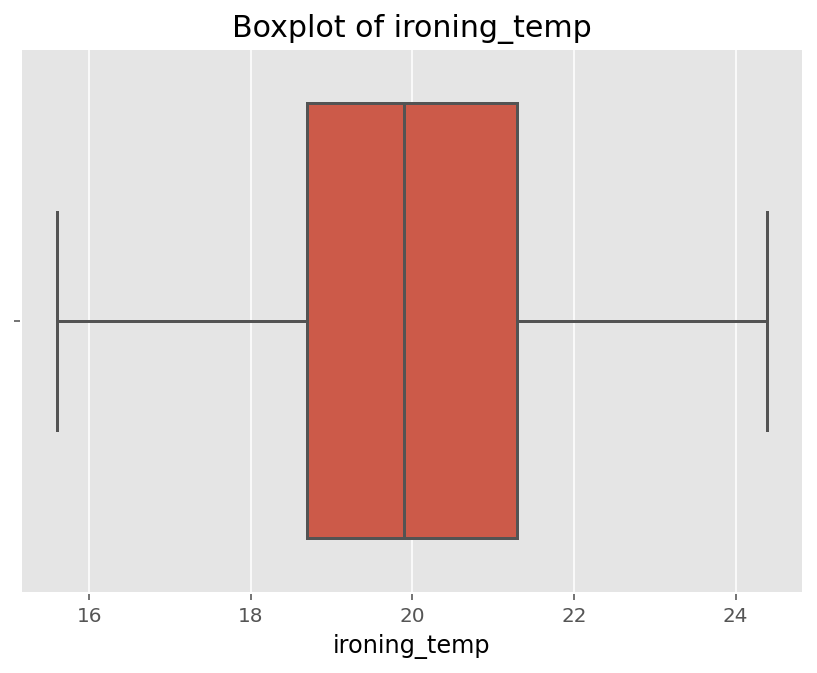

Number of ironing_humid outliers: 74


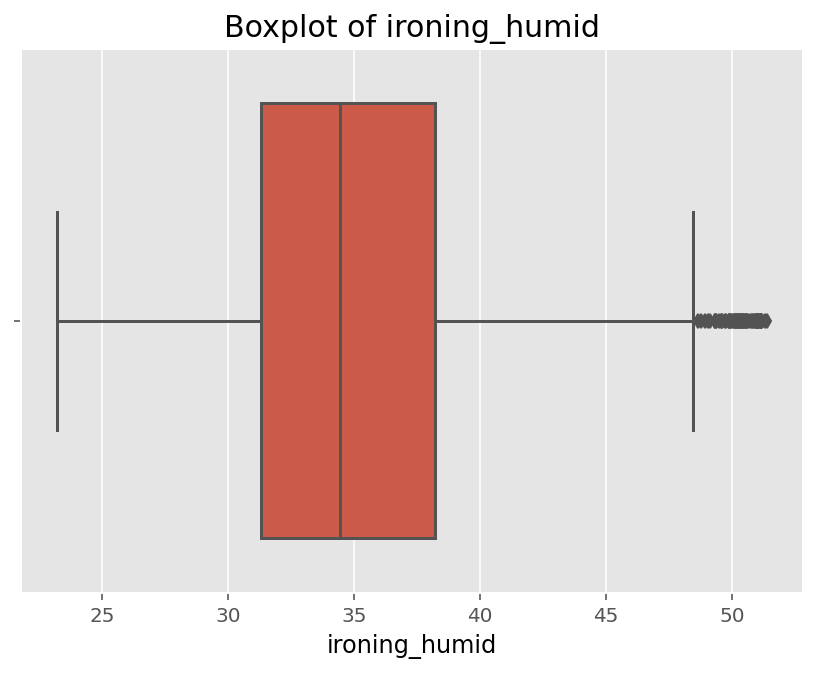

Number of teen2_temp outliers: 8


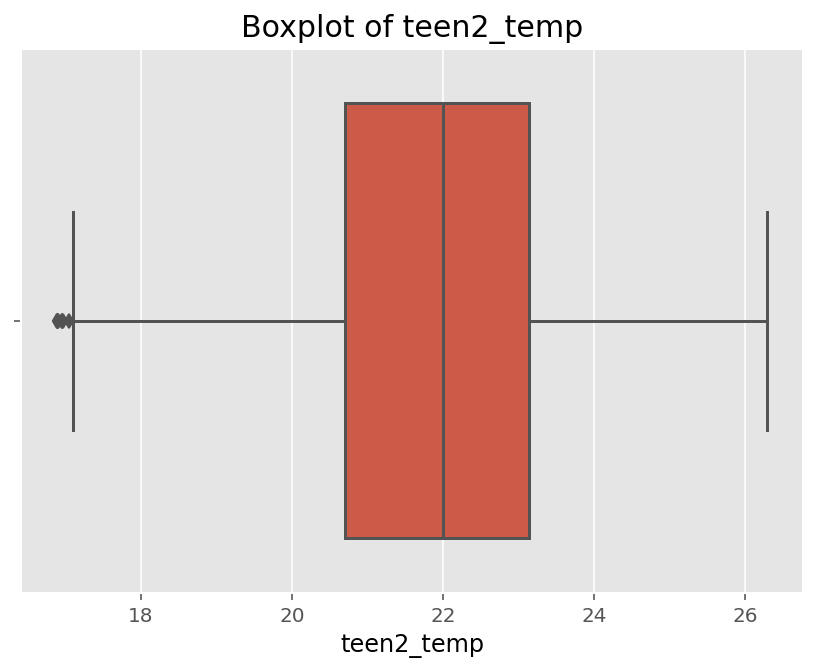

Number of teen2_humid outliers: 50


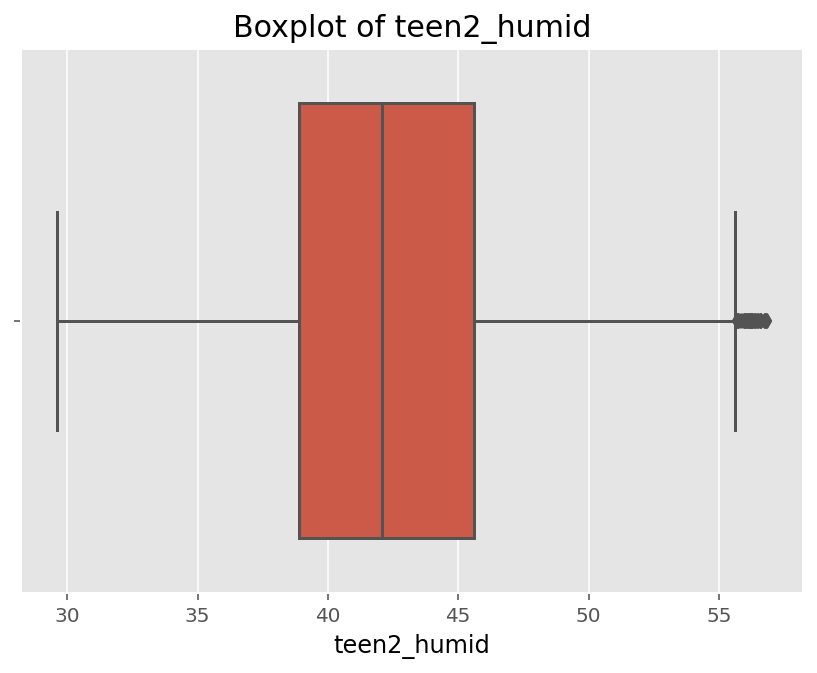

Number of parent_temp outliers: 7


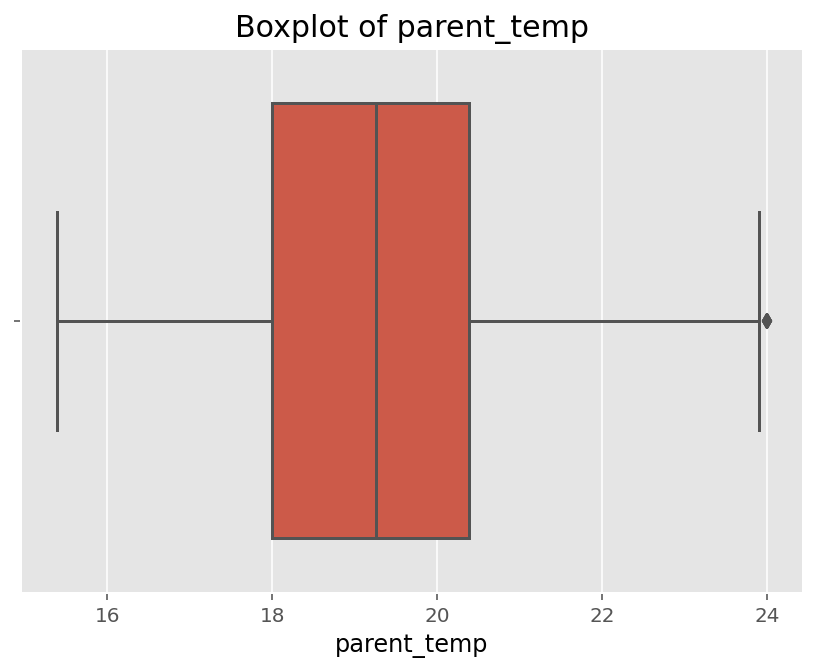

Number of parent_humid outliers: 39


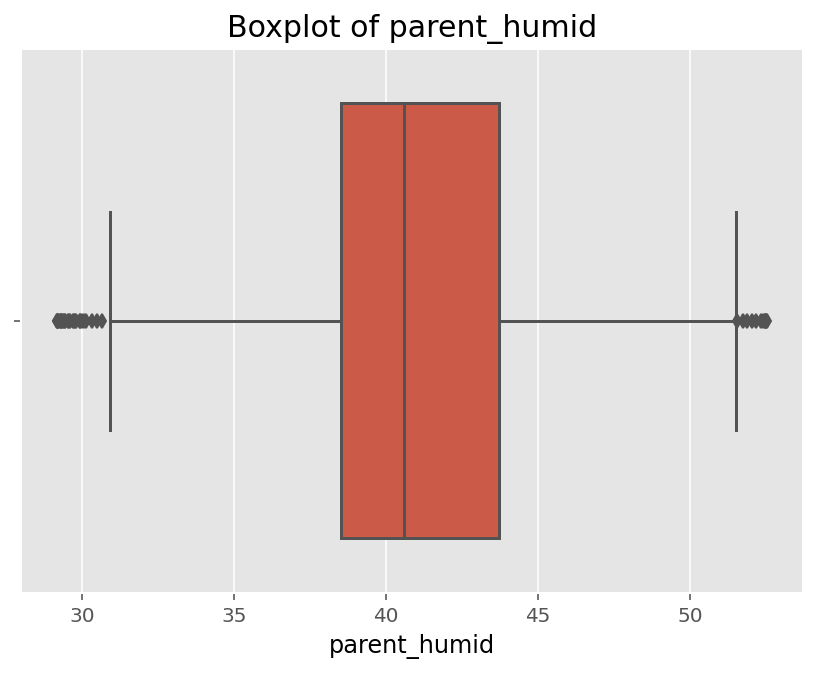

Number of t_out outliers: 15


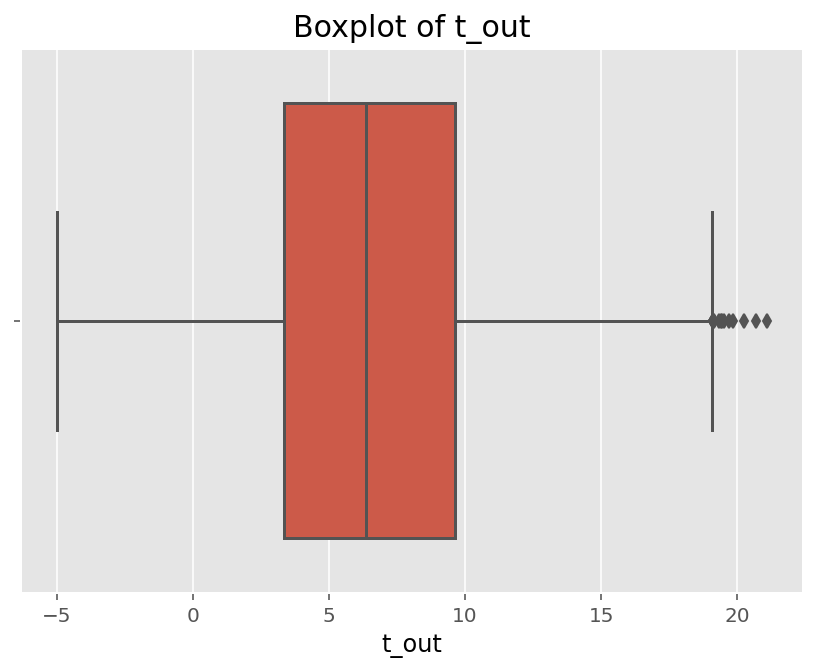

Number of press_mm_hg outliers: 215


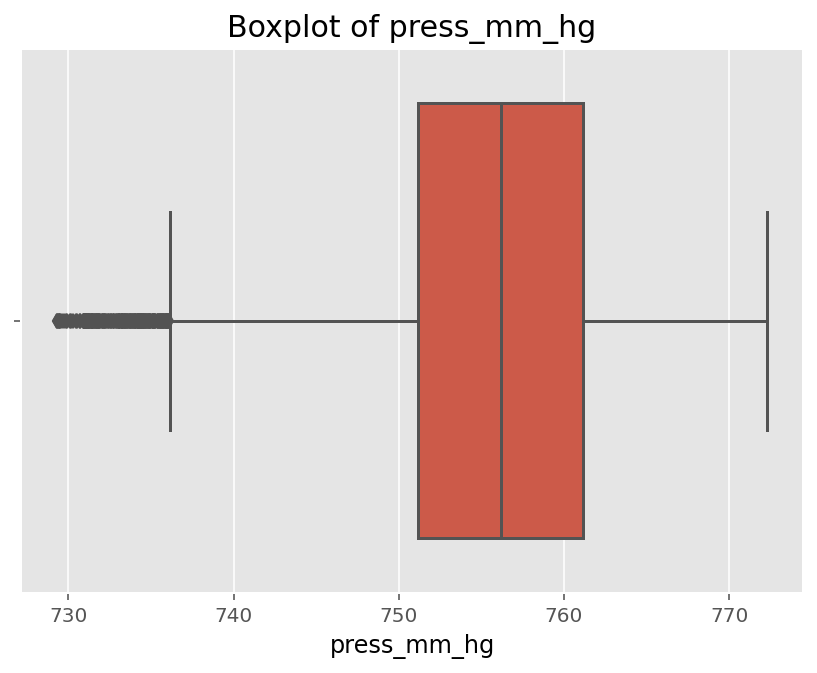

Number of humid_out outliers: 97


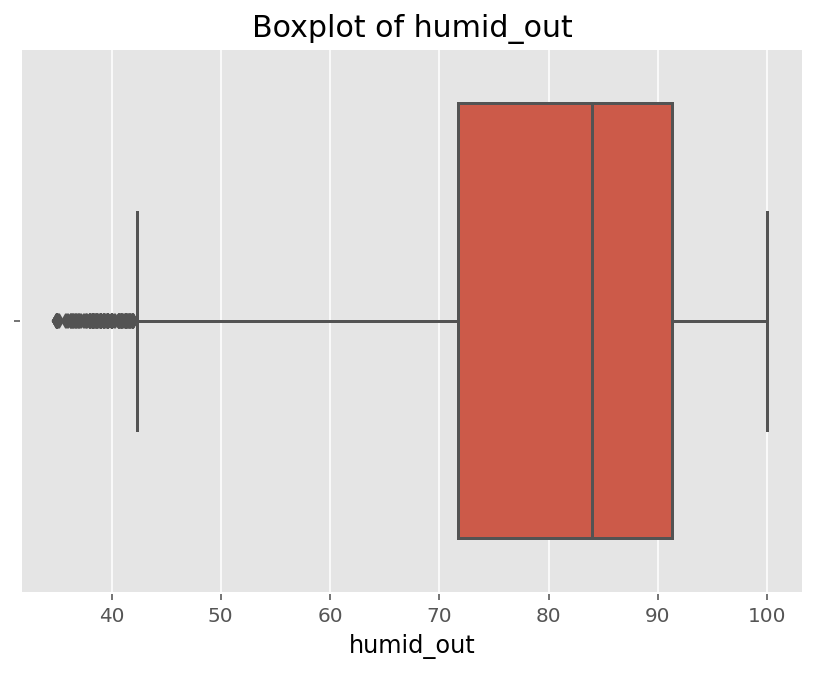

Number of windspeed outliers: 168


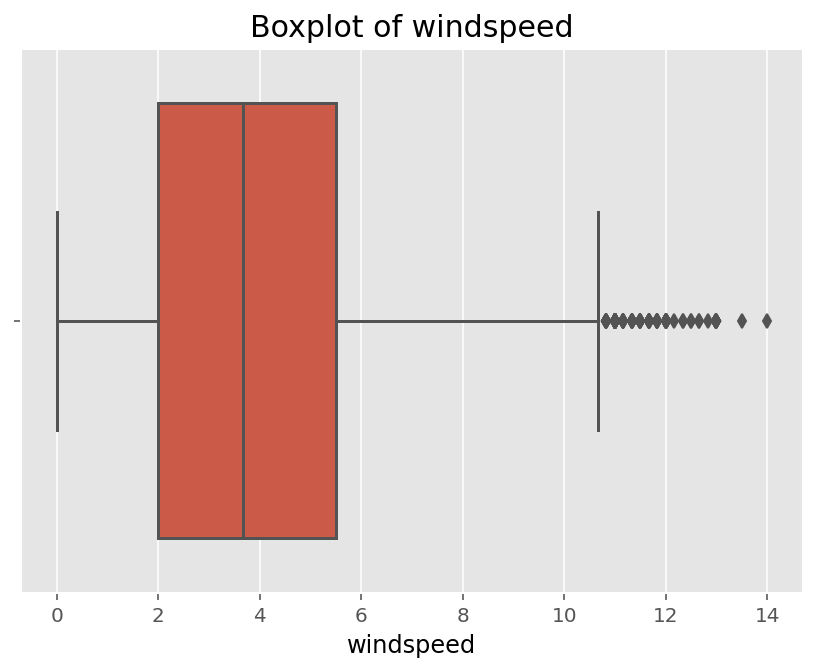

Number of visibility outliers: 2130


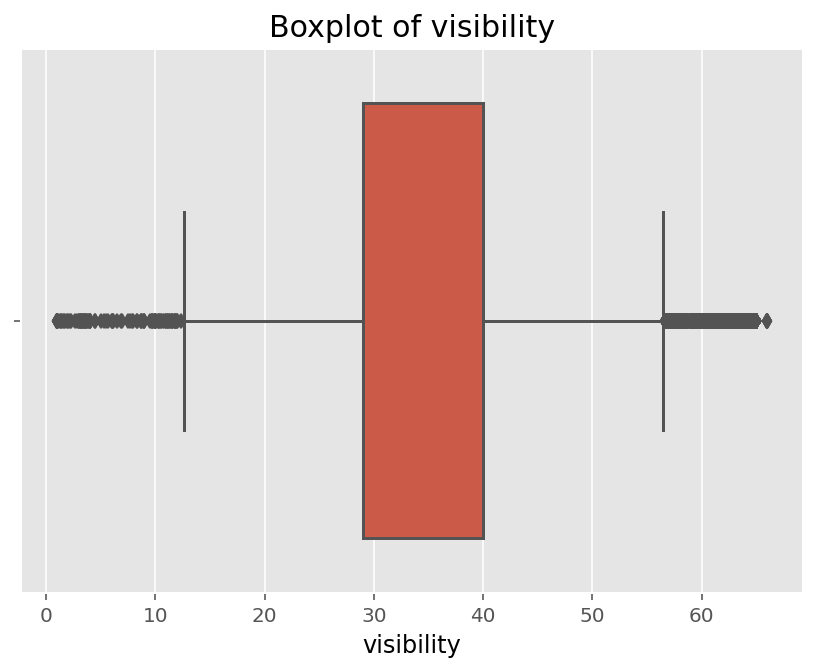

Number of tdewpoint outliers: 23


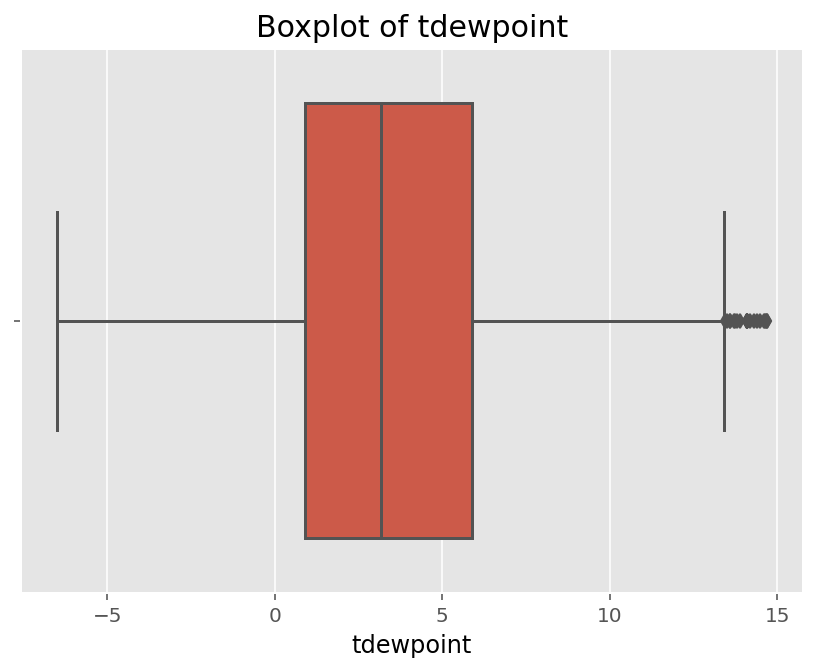

In [11]:
# Calling the outliers function for getting the outliers for different attributes 
df = func(df,'kitchen_temp')
df = func(df,'kitchen_humid')
df = func(df,'living_temp')
df = func(df,'living_humid')
df = func(df,'laundry_temp')
df = func(df,'laundry_humid')
df = func(df,'office_temp')
df = func(df,'office_humid')
df = func(df,'bathroom_temp')
df = func(df,'bathroom_humid')
df = func(df,'out_north_temp')
df = func(df,'out_north_humid')
df = func(df,'ironing_temp')
df = func(df,'ironing_humid')
df = func(df,'teen2_temp')
df = func(df,'teen2_humid')
df = func(df,'parent_temp')
df = func(df,'parent_humid')
df = func(df,'t_out')
df = func(df,'press_mm_hg')
df = func(df,'humid_out')
df = func(df,'windspeed')
df = func(df,'visibility')
df = func(df,'tdewpoint')

In [33]:
print(f"the final shape of the dataset after dropping all the outliers is = {df.shape} \n") # displaying the shape of the dataset after removal of outliers

the final shape of the dataset after dropping all the outliers is = (13706, 16) 



#### Statistical summary
Now, we present the statistical summary of all the numerical variables in our dataset.

In [13]:
# summary of the dataset attributes
from IPython.display import display, HTML
display(HTML('<b>Summary of numerical features</b>'))
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
kitchen_temp,13706.0,21.539036,1.288406,18.000000,20.790000,21.507143,22.390000,25.300000
kitchen_humid,13706.0,39.898988,3.436678,31.426667,37.300000,39.400000,42.363333,51.330000
living_temp,13706.0,20.035746,1.658549,16.200000,18.856667,19.862500,21.100000,25.230000
living_humid,13706.0,40.360111,3.524563,30.200000,37.900000,40.300000,43.000000,51.000000
laundry_temp,13706.0,22.146719,1.639449,18.000000,20.827500,22.100000,23.133333,26.790000
laundry_humid,13706.0,38.960312,3.027467,31.633333,36.790000,38.290000,40.700000,48.390000
office_temp,13706.0,20.732803,1.638029,16.100000,19.600000,20.633333,21.823333,24.890000
office_humid,13706.0,38.568887,3.964549,30.723333,35.363333,38.130000,41.067292,51.063333
bathroom_temp,13706.0,19.390188,1.503504,15.390000,18.200000,19.290000,20.390000,23.760000
bathroom_humid,13706.0,48.982534,5.585387,36.700000,45.000000,48.163333,52.477857,66.393333


### Feature Selection
We now use correlation to determine what attributes are highly correlated to the target feature and has a significant effect for ts prediction.

In [14]:
# To get the correlation attributes w.r.t. other attributes and the target variable
cor = df.corr()
cor

,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,bathroom_temp,bathroom_humid,out_north_temp,out_north_humid,ironing_temp,ironing_humid,teen2_temp,teen2_humid,parent_temp,parent_humid,t_out,press_mm_hg,humid_out,windspeed,visibility,tdewpoint,rv1,rv2,target_energy,month,hour
kitchen_temp,1.000000,0.049326,0.778035,-0.012770,0.850724,-0.101259,0.803215,0.024065,0.828257,-0.123827,0.533019,-0.562875,0.772864,0.027164,0.775912,-0.091427,0.785003,-0.035048,0.568882,-0.005580,-0.209954,-0.120898,0.077412,0.497383,-0.009947,-0.009947,0.048702,0.630854,0.179516
kitchen_humid,0.049326,1.000000,0.228390,0.796872,0.127217,0.837492,-0.017512,0.870023,0.088329,0.433158,0.282121,0.323288,-0.131541,0.754208,-0.177703,0.677157,-0.019086,0.726424,0.325583,-0.270914,0.245741,0.265583,0.063609,0.557049,-0.009779,-0.009779,0.086181,-0.215784,0.030499
living_temp,0.778035,0.228390,1.000000,-0.166178,0.614197,0.115168,0.652922,0.223252,0.595220,-0.041735,0.710342,-0.498120,0.525757,0.150059,0.458366,0.005055,0.548981,0.090879,0.698987,-0.022721,-0.413728,0.092510,0.092689,0.500564,-0.013068,-0.013068,0.113784,0.379154,0.292804
living_humid,-0.012770,0.796872,-0.166178,1.000000,0.147817,0.649794,-0.065806,0.711464,0.130981,0.374294,0.042633,0.378929,-0.080280,0.683927,-0.083558,0.645577,0.050884,0.652227,0.108611,-0.248640,0.527495,0.086901,0.011091,0.511802,-0.001847,-0.001847,-0.060154,-0.086226,-0.187482
laundry_temp,0.850724,0.127217,0.614197,0.147817,1.000000,-0.112368,0.775107,0.023556,0.857172,-0.155371,0.569942,-0.605195,0.786761,0.046819,0.749913,-0.057563,0.866761,0.019494,0.587762,-0.056288,-0.138247,-0.143819,0.057875,0.574016,-0.007992,-0.007992,0.069315,0.750120,0.014134
laundry_humid,-0.101259,0.837492,0.115168,0.649794,-0.112368,1.000000,-0.229981,0.891047,-0.149975,0.542512,0.027180,0.575651,-0.359819,0.818205,-0.399447,0.800728,-0.304992,0.834895,0.089930,-0.220590,0.314328,0.314014,0.036290,0.332502,-0.009177,-0.009177,0.034244,-0.514322,-0.067983
office_temp,0.803215,-0.017512,0.652922,-0.065806,0.775107,-0.229981,1.000000,-0.151924,0.821645,-0.212753,0.537701,-0.660126,0.812634,-0.072259,0.721603,-0.182252,0.835727,-0.149808,0.549438,0.094331,-0.258503,-0.247432,0.034312,0.438542,-0.002512,-0.002512,0.023651,0.731286,0.056608
office_humid,0.024065,0.870023,0.223252,0.711464,0.023556,0.891047,-0.151924,1.000000,-0.003841,0.483477,0.232478,0.447662,-0.253161,0.865415,-0.283981,0.800727,-0.150147,0.830529,0.284035,-0.240188,0.314144,0.344551,0.048745,0.555885,-0.007627,-0.007627,0.011068,-0.356257,-0.015112
bathroom_temp,0.828257,0.088329,0.595220,0.130981,0.857172,-0.149975,0.821645,-0.003841,1.000000,-0.154424,0.524430,-0.611238,0.830676,0.038859,0.780730,-0.070928,0.903066,-0.040206,0.547770,-0.040899,-0.126812,-0.199781,0.069507,0.532108,-0.011746,-0.011746,-0.024821,0.772856,0.009923
bathroom_humid,-0.123827,0.433158,-0.041735,0.374294,-0.155371,0.542512,-0.212753,0.483477,-0.154424,1.000000,-0.144711,0.409990,-0.262163,0.487601,-0.221744,0.522733,-0.253326,0.469796,-0.098507,-0.163157,0.250600,0.182811,-0.006329,0.073597,-0.006679,-0.006679,-0.054333,-0.356579,-0.063014


We now set a threshold to select only those attributes with correlation above 0.05 with the target feature.

In [15]:
# checking for significant attributes
threshold = 0.05
a = abs(cor['target_energy'])
result = a[a>threshold]
result

kitchen_humid      0.086181
living_temp        0.113784
living_humid       0.060154
laundry_temp       0.069315
bathroom_humid     0.054333
out_north_temp     0.109339
out_north_humid    0.055255
ironing_humid      0.086584
teen2_humid        0.126197
parent_humid       0.062191
t_out              0.081808
humid_out          0.153312
windspeed          0.095766
target_energy      1.000000
month              0.051892
hour               0.228939
Name: target_energy, dtype: float64

Removing the attributes with correlation less than 0.05 with the target feature.

In [16]:
# Removing insignificant attributes
df = df.drop(['kitchen_temp', 'laundry_humid', 'office_temp', 'office_humid', 'bathroom_temp', 'ironing_temp', 'teen2_temp', 'parent_temp', 'press_mm_hg', 'visibility', 'tdewpoint', 'rv1', 'rv2'],1)
df.shape

(13706, 16)

### Data Distribution and Visualisation 

One of the most important step in EDA is estimating the distribution of a variable. Let's begin with histogram plot.

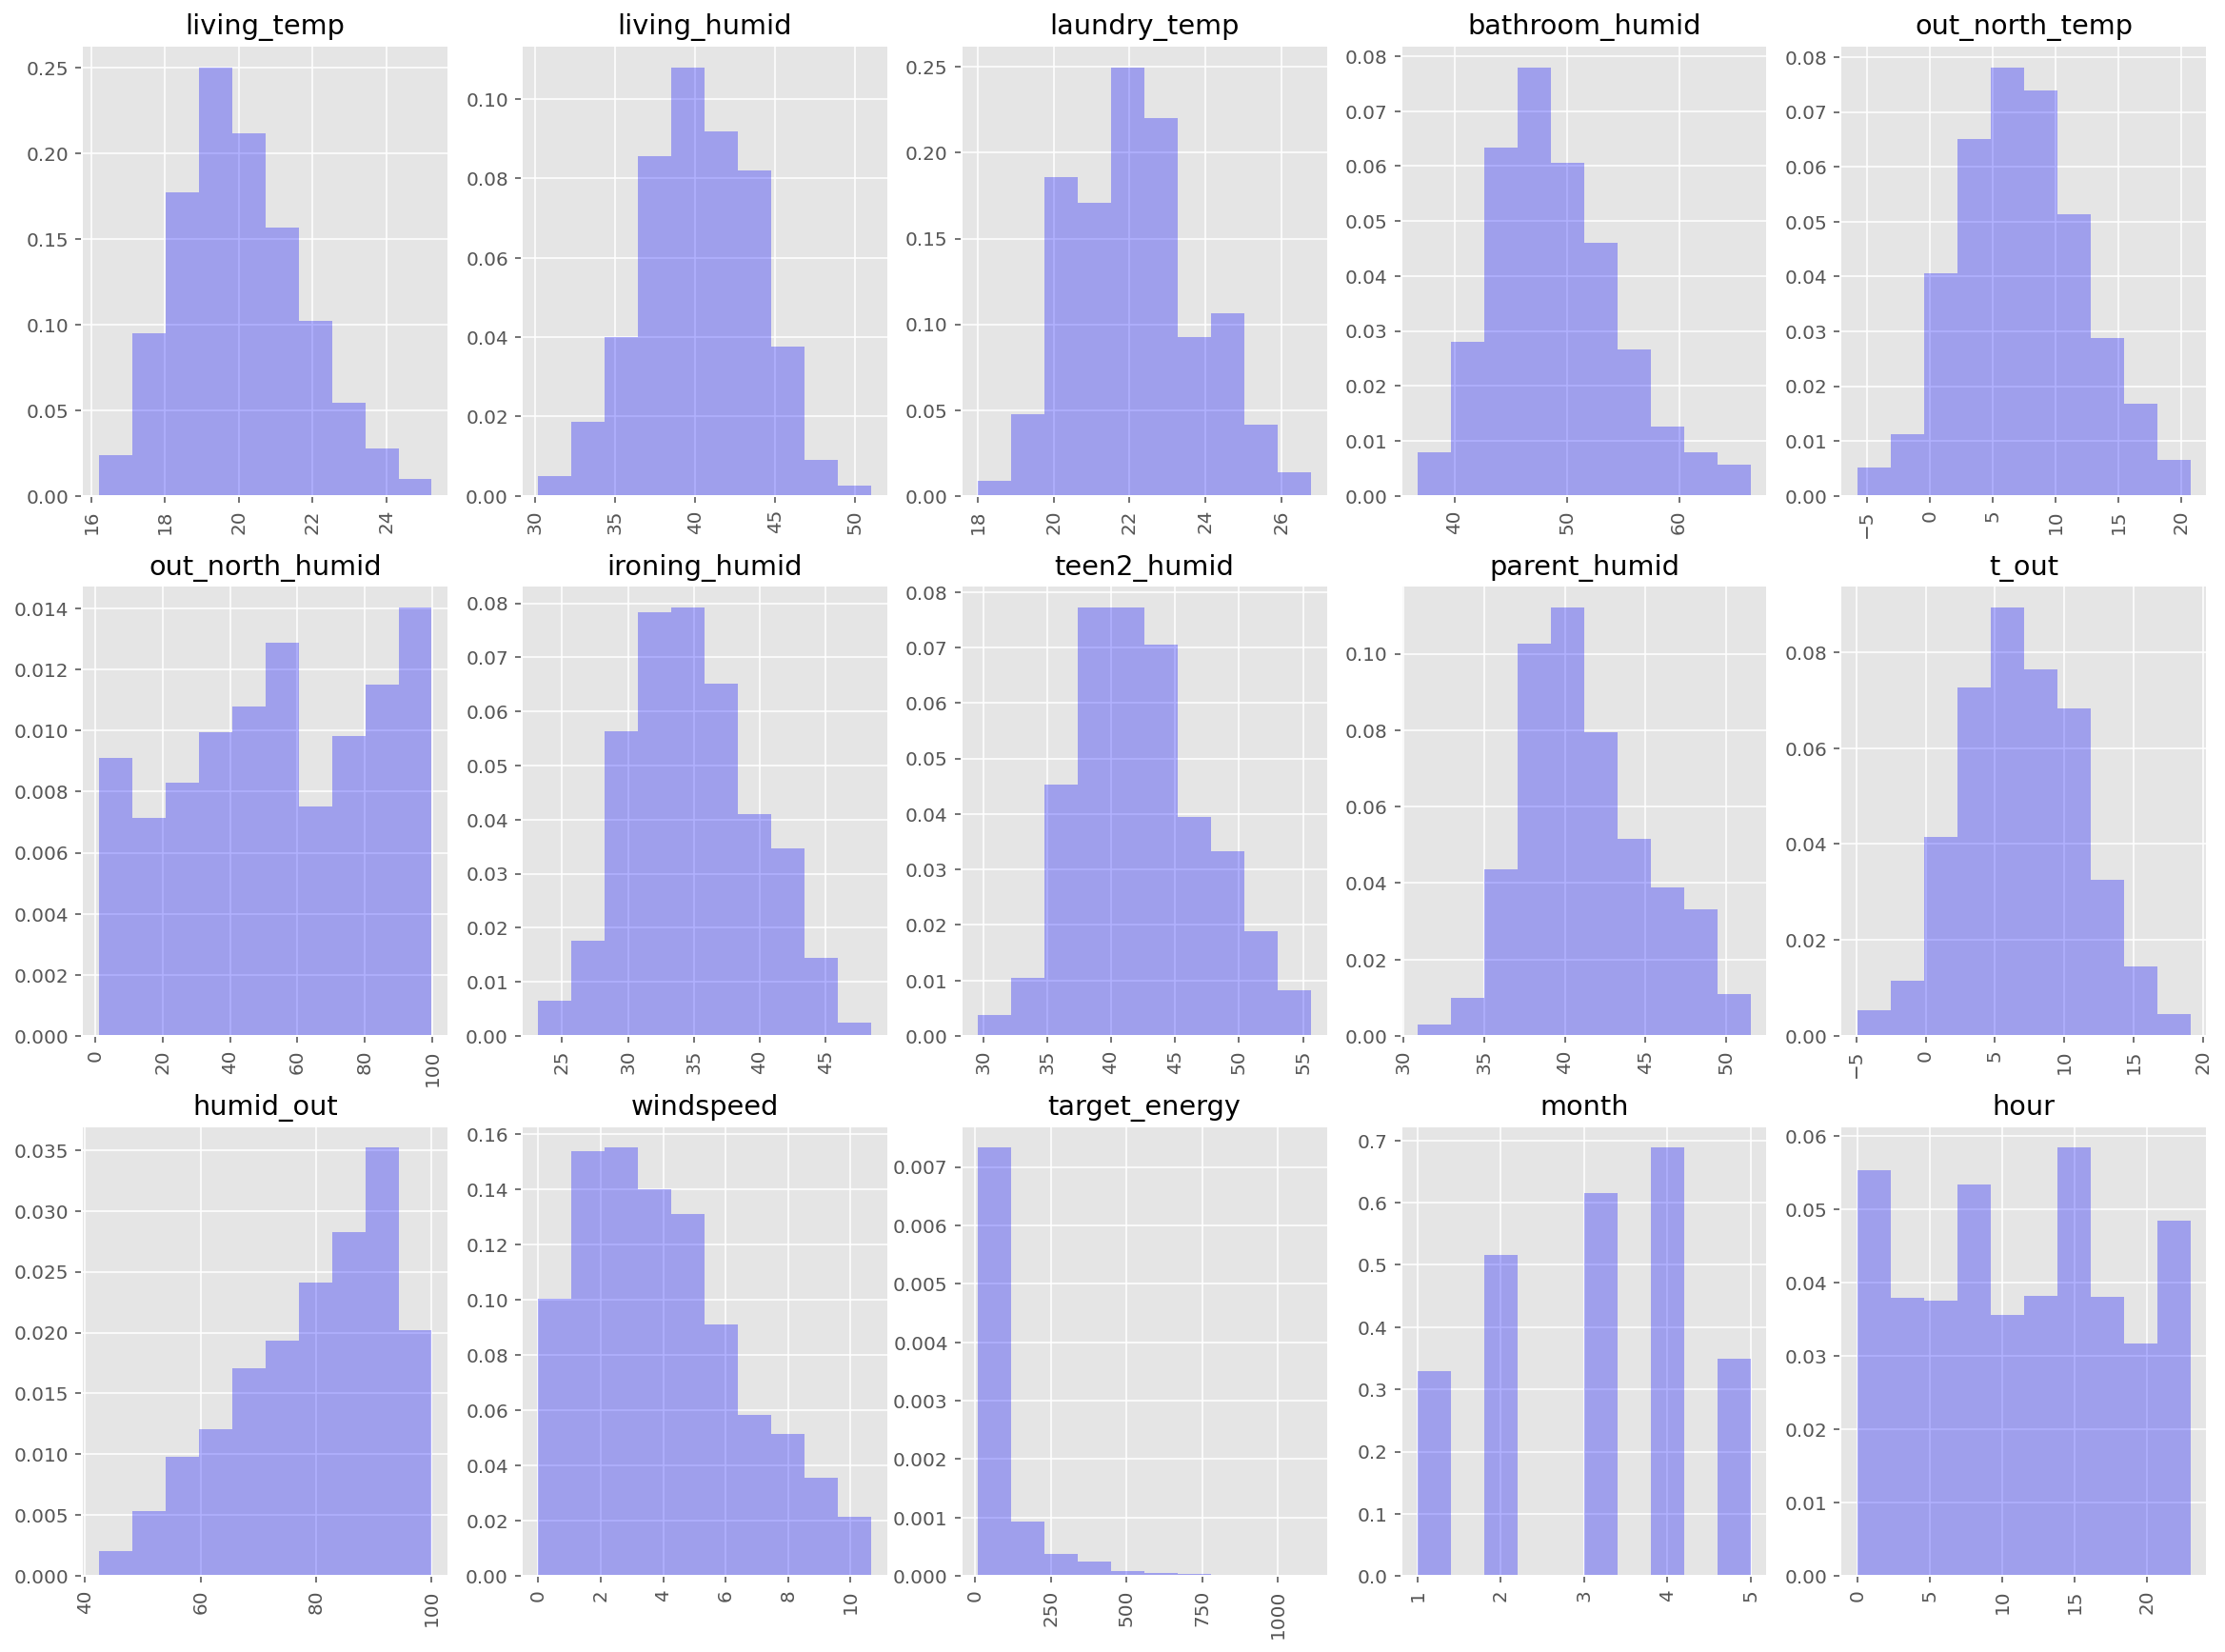

In [17]:
# histogram plot for checking trend of attributes
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns[1:21]):
    plt.subplot(4,5,i+1)
    plt.hist(df[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

#### Observations:
- Most of the attributes are normally distributed displaying a symmetrical graph.
- `humid_out` is left skewed and `windspeed` seems to be right skewed from the above graph.

#### Relationship between variables
In the previous section, the observed was each attribute (data column) independently. Sometimes it is also useful to observe the relationship between different variables.
Correlation is another important statistic when developing ML models. Let's plot the correlation matrix for the numerical data we have:

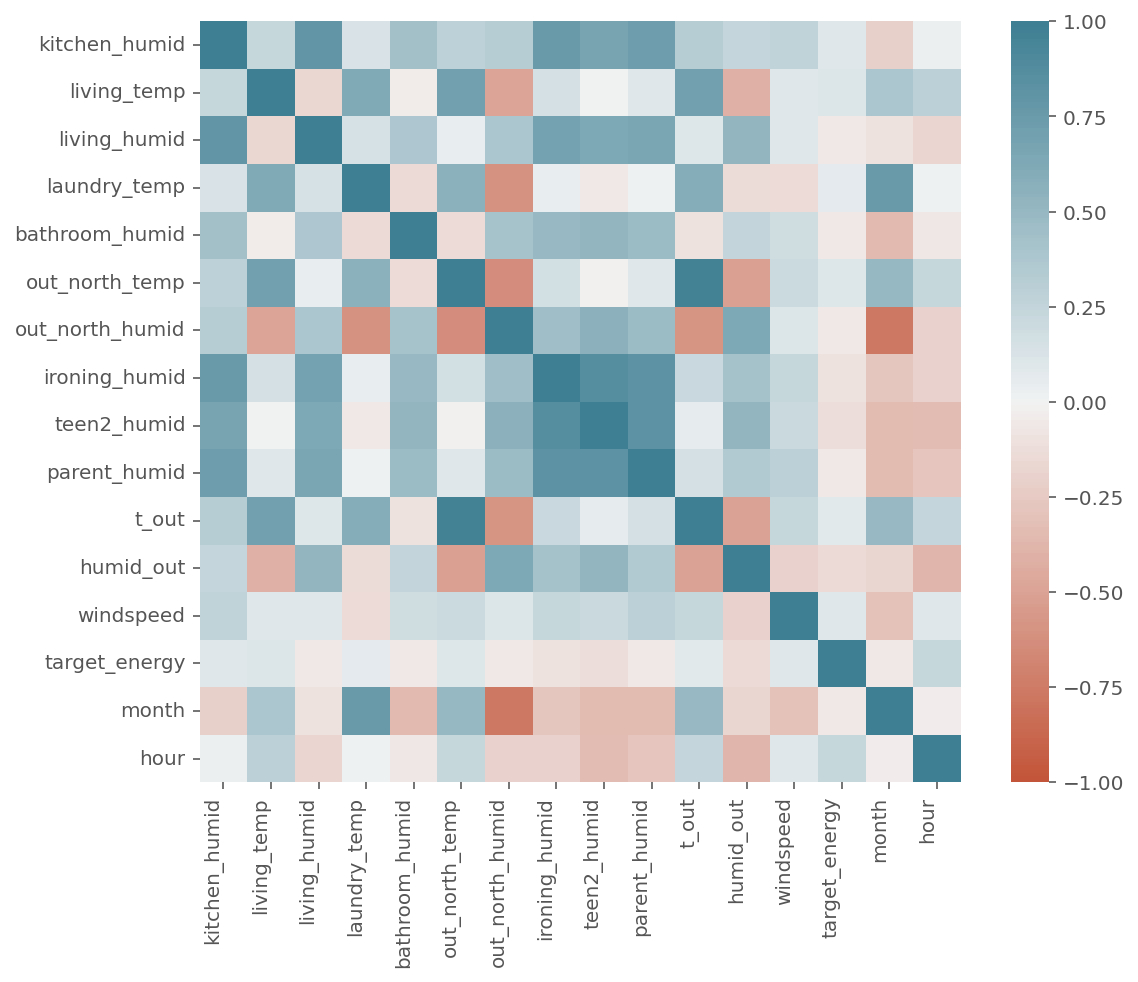

In [18]:
# Heatmap to determine the correation of attributes
import seaborn as sns
f, ax = plt.subplots(figsize=(9, 7))
corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

Correlation visualizes the relationship between each column in our dataset in a compact manner.

#### Observations:
- The `parent_humid`, `ironing_humid` and `teen2_humid` have a very high correlation with each other. These three are also highly correlated to `kitchen_humid`. 
- `out_north_humid` and `month` have a high negative correlation.

#### Observing the target feature
Finally let's visualise the target feature 'target_energy' with a histogram.

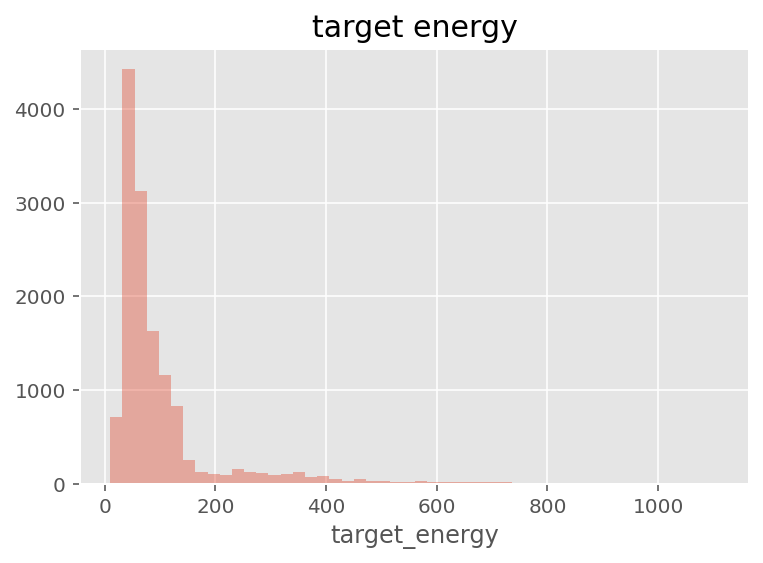

In [19]:
# Plot for observing the target attribute
sns.distplot(df['target_energy'], kde = False).set_title('target energy', fontsize = 15)
plt.show()

#### Observation:
We can observe that the graph is highly right skewed.

In [20]:
# separating target attribute and all the other attributes
train_X = df.drop(columns=['target_energy']).copy()
train_y = df[['target_energy']].copy()

In [21]:
# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=0)

# printing the shape of the test and train datasets divided above
print(df_X_train.shape)
print(df_X_test.shape)
print(df_y_train.shape)
print(df_y_test.shape)

(10964, 15)
(2742, 15)
(10964, 1)
(2742, 1)


In [22]:
# scaling the features
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train_sc=scaler.fit_transform(df_X_train)
X_test_sc=scaler.transform(df_X_test)
y_train_sc=scaler.fit_transform(df_y_train)
y_test_sc=scaler.transform(df_y_test)

In [23]:
# random forest regression model
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 150, random_state = 0, criterion = 'squared_error', max_features = 'sqrt', min_samples_leaf= 1,
                            min_samples_split = 2)

In [24]:
# forest model fitting
clf.fit(X_train_sc, y_train_sc)

RandomForestRegressor(max_features='sqrt', n_estimators=150, random_state=0)

In [25]:
# predicting the values for the test dataset
y_pred = clf.predict(X_test_sc)

In [26]:
# performance evalutation metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_sc, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_sc, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_sc, y_pred)))
print('R2 Score:', r2_score(y_test_sc.ravel(), y_pred))

Mean Absolute Error: 0.3003588853018179
Mean Squared Error: 0.4074430047040719
Root Mean Squared Error: 0.6383126230179628
R2 Score: 0.5956249791250675


In [27]:
# decision tree regression model
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0, criterion = 'squared_error', splitter = 'random', min_samples_leaf= 1,
                                  min_samples_split = 2)

# fitting the regressor object to the dataset
regressor.fit(X_train_sc, y_train_sc)

DecisionTreeRegressor(random_state=0, splitter='random')

In [28]:
# predicting the values for the test dataset
y_pred = regressor.predict(X_test_sc)

In [29]:
# performance evalutation metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_sc, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_sc, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_sc, y_pred)))
print('R2 Score:', r2_score(y_test_sc.ravel(), y_pred))

Mean Absolute Error: 0.3537257236185315
Mean Squared Error: 0.6909996887327352
Root Mean Squared Error: 0.8312639103995404
R2 Score: 0.31420343378132576


In [30]:
# linear regression model
from sklearn.linear_model import LinearRegression

# developing the model and fitting the dataset
model_lr = LinearRegression(normalize=True).fit(X_train_sc, y_train_sc)

# predicting the values for the test dataset
y_pred = model_lr.predict(X_test_sc)

In [31]:
# performance evaluation metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_sc, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_sc, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_sc, y_pred)))
print('R2 Score:', r2_score(y_test_sc.ravel(), y_pred))

Mean Absolute Error: 0.5354694637454718
Mean Squared Error: 0.8430221986616677
Root Mean Squared Error: 0.9181624032063542
R2 Score: 0.16332563022050461


Epoch 1/100
343/343 [==============================] - 2s 2ms/step - loss: 0.9436 - val_loss: 0.8283
Epoch 2/100
343/343 [==============================] - 0s 895us/step - loss: 0.8189 - val_loss: 0.8031
Epoch 3/100
343/343 [==============================] - 0s 1ms/step - loss: 0.8080 - val_loss: 0.7890
Epoch 4/100
343/343 [==============================] - 0s 1ms/step - loss: 0.8034 - val_loss: 0.7919
Epoch 5/100
343/343 [==============================] - 0s 1ms/step - loss: 0.7908 - val_loss: 0.7854
Epoch 6/100
343/343 [==============================] - 0s 1ms/step - loss: 0.7799 - val_loss: 0.7642
Epoch 7/100
343/343 [==============================] - 0s 1ms/step - loss: 0.7803 - val_loss: 0.7584
Epoch 8/100
343/343 [==============================] - 0s 1ms/step - loss: 0.7726 - val_loss: 0.7539
Epoch 9/100
343/343 [==============================] - 0s 1ms/step - loss: 0.7714 - val_loss: 0.7572
Epoch 10/100
343/343 [==============================] - 0s 1ms/step - loss: 0.7682 - val_

343/343 [==============================] - 0s 1ms/step - loss: 0.6814 - val_loss: 0.7148
Epoch 82/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6855 - val_loss: 0.7151
Epoch 83/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6803 - val_loss: 0.7621
Epoch 84/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6829 - val_loss: 0.7084
Epoch 85/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6838 - val_loss: 0.6962
Epoch 86/100
343/343 [==============================] - 1s 2ms/step - loss: 0.6859 - val_loss: 0.7019
Epoch 87/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6878 - val_loss: 0.7322
Epoch 88/100
343/343 [==============================] - 1s 1ms/step - loss: 0.6803 - val_loss: 0.6951
Epoch 89/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6790 - val_loss: 0.7632
Epoch 90/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6797 - val_loss: 

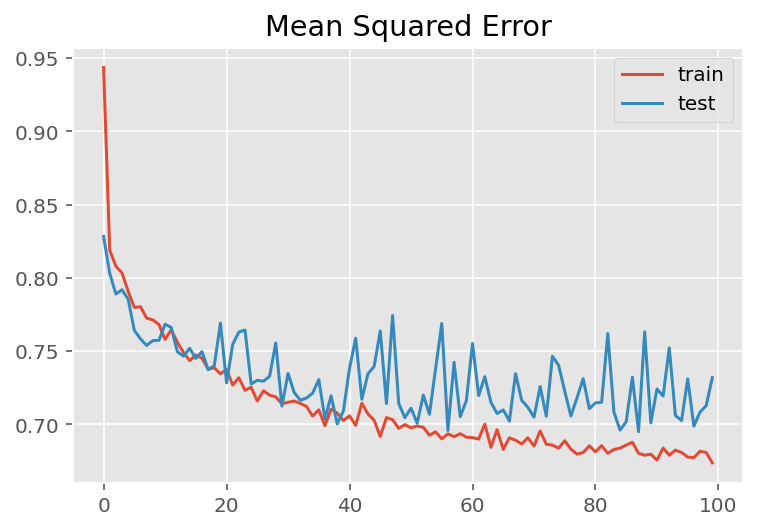

In [32]:
# Neural Network Model on a regression type problem

# importing keras an tensorflow modules and libraries
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# Defining the Sequential type model in Neural Network
model = Sequential()
model.add(Dense(25, input_dim=15, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt) # setting the loss function as mean squared error

# fitting the model on the training data and then predicting values on the test data
# setting verbose to 1 for getting iteration details
history = model.fit(X_train_sc, y_train_sc, validation_data=(X_test_sc, y_test_sc), epochs=100, verbose=1)

# performance evaluation metrics
train_mse = model.evaluate(X_train_sc, y_train_sc, verbose=0)
test_mse = model.evaluate(X_test_sc, y_test_sc, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plotting the loss- train data vs test data
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()